In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from cms_top_20_001_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [2]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')
recastDataEFT = pd.read_pickle('./pp2tt_eft_scan.pcl')

In [3]:
recastData[['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
0,300.0,5.0,4.323347
1,300.0,50.0,4.435813
2,300.0,100.0,4.712325
3,300.0,150.0,5.041696
4,300.0,200.0,5.505099
...,...,...,...
202,3000.0,2900.0,44.361199
203,3000.0,2925.0,44.409711
204,3000.0,2950.0,44.547940
205,3000.0,2975.0,44.621595


In [4]:
recastDataEFT[['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
0,300.0,5.0,3.923743
1,300.0,50.0,3.954835
2,300.0,100.0,4.023698
3,300.0,150.0,4.082629
4,300.0,200.0,4.220508
...,...,...,...
160,3000.0,2900.0,45.646232
161,3000.0,2925.0,45.745831
162,3000.0,2950.0,45.831945
163,3000.0,2975.0,45.912042


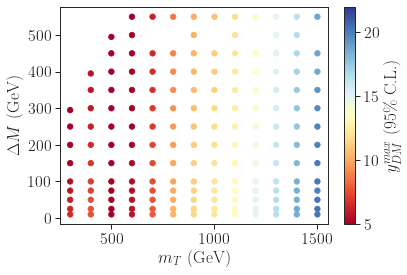

In [5]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [6]:
red = recastData[(recastData['mST'] ==500.) & (recastData['mChi'] ==200.)]
redEFT = recastDataEFT[(recastDataEFT['mST'] ==500.) & (recastDataEFT['mChi'] ==200.)]

In [7]:
red

,model,mST,mChi,mT,yDM,process,xsec (pb),MC Events,file,bin_250_400,...,bin_1500_1700_Error,bin_1700_2000,bin_1700_2000_Error,bin_2000_2300,bin_2000_2300_Error,bin_2300_3500,bin_2300_3500_Error,yDM (95% C.L.),$\Delta \chi^2$ (95% C.L.),yDMexp (95% C.L.)
24,Top-FormFactorsOneLoop-UFO,500.0,200.0,172.5,1.0,$g g \to \bar{t} t$$q q \to \bar{t} t$,-0.000071,150000,../../processFolders/gg2tt_formFactors_scan/Ev...,-0.009032,...,0.000002,-0.000019,8.805250e-07,-0.000019,3.780440e-07,-0.000024,2.342618e-07,4.07209,3.84,6.815732


In [8]:
redEFT

,model,mST,mChi,mT,yDM,process,xsec (pb),MC Events,file,bin_250_400,...,bin_1500_1700_Error,bin_1700_2000,bin_1700_2000_Error,bin_2000_2300,bin_2000_2300_Error,bin_2300_3500,bin_2300_3500_Error,yDM (95% C.L.),$\Delta \chi^2$ (95% C.L.),yDMexp (95% C.L.)
21,Top-EFTphysical_simple-UFO,500.0,200.0,172.5,1.0,$g g \to \bar{t} t$$q q \to \bar{t} t$,0.000145,150000,../../processFolders/gg2tt_eft_scan/Events/run...,-0.009241,...,0.000001,0.000034,8.994179e-07,0.000023,4.537482e-07,0.000029,2.975484e-07,6.753805,3.84,11.174885


In [9]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_CMSdata()
# covMatrix = np.diag(covMatrix.diagonal()) # Ignore correlations
# ### Load SM prediction (LO)
smLO = getSMLO()
# ### Load k-factors
kfac = getKfactor(sm,smLO)
sm = kfac*smLO


In [10]:
binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])               

In [11]:
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]

signalEFT = list(zip(bins_left,redEFT.iloc[0][binCols].values))
signalEFT = np.array(sorted(signalEFT))[:,1]

In [12]:
signal = kfac*signal
signalEFT = kfac*signalEFT

In [13]:
signal = signal/bin_widths
signalEFT = signalEFT/bin_widths
sm = sm/bin_widths

In [21]:
res = getUL(signal,sm,xsecsObs,covMatrix)
resEFT = getUL(signalEFT,sm,xsecsObs,covMatrix)
print(res)
print(resEFT)

{'yDMmin': array([1.05964571e-06]), 'chi2min': 18.467925040846822, 'yDM95': 4.07208985192552, 'deltaChi95': 3.8400000000000247}
{'yDMmin': array([9.35018297e-06]), 'chi2min': 18.46792504085301, 'yDM95': 6.753805395569848, 'deltaChi95': 3.8399999999999537}


In [22]:
yDMvals = np.linspace(0.,10.,100)
c2 = np.array([chi2(y, signal, sm, xsecsObs, covMatrix, 0.2) for y in yDMvals])
c2EFT = np.array([chi2(y, signalEFT, sm, xsecsObs, covMatrix, 0.2) for y in yDMvals])

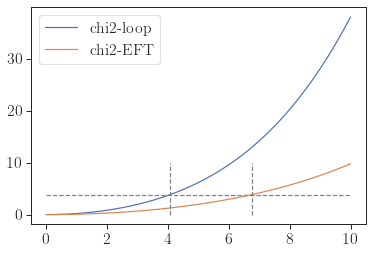

In [23]:
plt.plot(yDMvals,c2-res['chi2min'],label='chi2-loop')
plt.plot(yDMvals,c2EFT-resEFT['chi2min'],label='chi2-EFT')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=res['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.vlines(x=resEFT['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
# plt.ylim(0,100)
plt.show()